### Mağaza sahibi, son birkaç yılda satılan ürünlerle ilgili verileri toplamıştır. Verileride her ürün için satış miktarı, fiyatı, ürün kategorisi, müşteri bilgileri ve satın alma tarihi gibi bilgiler yer almaktadır. 

In [2]:
import pandas as pd

# Veri setini oluşturma
data = {'Ürün': ['Ayakkabı', 'Çanta', 'T-Shirt', 'Pantolon', 'Şapka', 'Cüzdan', 'Kemer', 'Gözlük', 'Şort', 'Eşarp'],
        'Satış_Miktarı': [250, 300, 150, 200, 100, 75, 50, 25, 100, 125],
        'Fiyat': [150, 200, 50, 100, 25, 75, 40, 200, 40, 75],
        'Kategori': ['Giyim', 'Giyim', 'Giyim', 'Giyim', 'Aksesuar', 'Aksesuar', 'Aksesuar', 'Aksesuar', 'Giyim', 'Aksesuar'],
        'Müşteri_Tipi': ['Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın'],
        'Satın_Alma_Tarihi': ['2022-01-01', '2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02', '2022-01-02', '2022-01-03', '2022-01-03', '2022-01-03', '2022-01-03']
        }

df = pd.DataFrame(data)
df.head()

,Ürün,Satış_Miktarı,Fiyat,Kategori,Müşteri_Tipi,Satın_Alma_Tarihi
0,Ayakkabı,250,150,Giyim,Erkek,2022-01-01
1,Çanta,300,200,Giyim,Kadın,2022-01-01
2,T-Shirt,150,50,Giyim,Erkek,2022-01-01
3,Pantolon,200,100,Giyim,Kadın,2022-01-02
4,Şapka,100,25,Aksesuar,Erkek,2022-01-02


# Hipotez Testleri

### H0: Erkek müşteriler kadın müşterilere göre daha fazla alışveriş yapar.
### H1: Erkek müşterileri kadın müşterilere göre daha fazla alışveriş yapmaz.

#### Bu hipotez için, t-testi kullanılabilir. T-testi, iki grup arasındaki ortalama değer farkının istatistiksel olarak anlamlı olup olmadığını test etmek için kullanılır. Burada iki grup, erkek müşteriler ve kadın müşterilerdir. 

In [3]:
# erkek müşterilerin satın alma miktarı
male_sales = df[df['Müşteri_Tipi'] == 'Erkek']['Satış_Miktarı']

# kadın müşterilerin satın alma miktarı
female_sales = df[df['Müşteri_Tipi'] == 'Kadın']['Satış_Miktarı']

In [13]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(male_sales, female_sales)
print('Test İstatistiği: ', t_stat)
print('P-Value: ', p_value)

alpha = 0.05
if p_value < alpha:
    print('H0 hipotezi reddedilmez. Erkek müşteriler, kadın müşterilere göre daha fazla alışveriş yapar')
else:
    print('H0 hipotezi reddedilir. Erkek müşteriler, kadın müşterilere göre daha fazla alışveriş yapmaz.')

Test İstatistiği:  -0.254000254000381
P-Value:  0.8059018006754489
H0 hipotezi reddedilir. Erkek müşteriler, kadın müşterilere göre daha fazla alışveriş yapmaz.


### Şimdi ise hipotez testimizin sağlamasını yapalım.

In [12]:
df.groupby('Müşteri_Tipi')['Satış_Miktarı'].count()

Müşteri_Tipi
Erkek    5
Kadın    5
Name: Satış_Miktarı, dtype: int64

# ----------------------------------------

### H0: Farklı kategorilerdeki ürünlerin fiyatları birbirinden farklı değildir.
### H1: Farklı kategorilerdeki ürünlerin fiyatları birbirinden farklıdır.

#### Bu hipotez için, ANOVA (Analysis of Variance) (Varyans Analizi) testi kullanabiliriz. ANOVA testi, iki veya daha fazla grup arasındaki farklılıkları karşılaştırmak için kullanılır.

In [9]:
# kategorilere göre fiyatların ortalaması
grouped_df = df.groupby('Kategori')['Fiyat'].mean()
grouped_df

Kategori
Aksesuar     83.0
Giyim       108.0
Name: Fiyat, dtype: float64

In [11]:
from scipy.stats import f_oneway

result = f_oneway(
    df[df['Kategori'] == 'Giyim']['Fiyat'],
    df[df['Kategori'] == 'Aksesuar']['Fiyat']
)
print('P-Value: ', result.pvalue)

alpha = 0.05
if result.pvalue < alpha:
    print('H0 hipotezi reddedilmez. Farklı kategorilerdeki ürünlerin fiyatları birbirinden farklı değildir.')
else:
    print('H0 hipotezi reddedilir. Farklı kategorilerdeki ürünlerin fiyatları birbirinden farklıdır.')

P-Value:  0.5786394813078377
H0 hipotezi reddedilir. Farklı kategorilerdeki ürünlerin fiyatları birbirinden farklıdır.


### Şimdi ise hipotez testimizin sağlamasını yapalım.

In [14]:
df.groupby('Kategori')['Fiyat'].mean()

Kategori
Aksesuar     83.0
Giyim       108.0
Name: Fiyat, dtype: float64

# ---------------------------------------

### H0: Satış miktarı ve fiyat arasında bir ilişki vardır.
### H1: Satış miktarı ve fiyat arasında bir ilişki yoktur.

#### Bu hipotez için, Pearson korelasyon testini kullanabiliriz. Pearson korelasyon testi, iki değişken arasındaki ilişkiyi ölçmek için kullanılır. Bu test, iki değişken arasındaki doğrusal bir ilişkinin varlığını ve gücünü belirlemek için kullanılır.

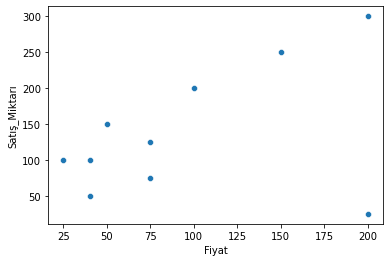

In [16]:
import seaborn as sns
sns.scatterplot(data=df, x='Fiyat', y='Satış_Miktarı');

In [21]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Fiyat'], df['Satış_Miktarı'])

print('Korelasyon Katsayısı: ', corr)
print('P-Value: ', p_value)

alpha = 0.05
if p_value < alpha:
    print('H0 hipotezi reddedilir. Satış miktarı ve fiyat arasında bir ilişki yoktur.')
else: 
    print('H0 hipotezi reddedilmez. Satış miktarı ve fiyat arasında bir ilişki vardır.')

Korelasyon Katsayısı:  0.4243955919514043
P-Value:  0.22154911839543012
H0 hipotezi reddedilmez. Satış miktarı ve fiyat arasında bir ilişki vardır.
